In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

Text(0, 0.5, 'Y dataset')

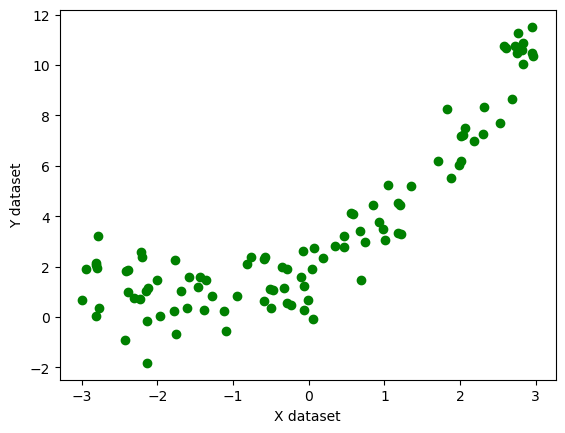

In [28]:
x = 6 * np.random.rand(100,1) - 3
y = 0.5 * x**2 + 1.5*x + 2 + np.random.randn(100,1)
# quadratic equation used y=0.5x^2+1.5x+2+outliers
plt.scatter(x,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
## Lts implement simple linear Regression

from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()


In [31]:
regression_1.fit(x_train,y_train)

LinearRegression()

In [32]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression_1.predict(x_test))
print(score)

0.7323162742122901


Text(0, 0.5, 'Y')

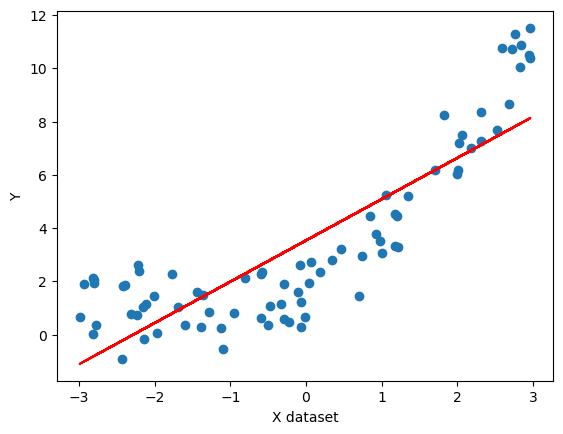

In [33]:
## Lets visualize this model

plt.plot(x_train,regression_1.predict(x_train),color='r')
plt.scatter(x_train,y_train)
plt.xlabel('X dataset')
plt.ylabel('Y')

In [34]:
## LEts Apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [35]:
poly = PolynomialFeatures(degree=2,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [36]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(x_train_poly,y_train)
y_pred = regression.predict(x_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.8996634627014866


In [37]:
print(regression.coef_)

[[0.         1.53992522 0.51660835]]


In [38]:
print(regression.intercept_)

[1.80850282]


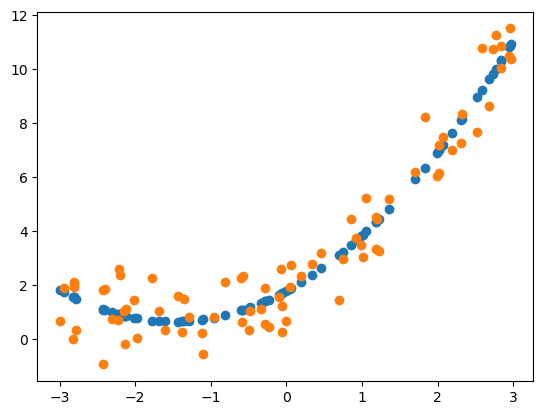

In [39]:
plt.scatter(x_train,regression.predict(x_train_poly))
plt.scatter(x_train,y_train)

In [41]:
# prediction of new data set

x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
x_new_poly


array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

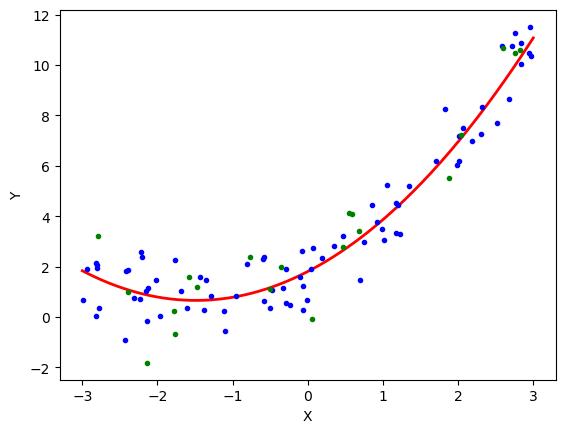

In [45]:
y_new = regression.predict(x_new_poly)
plt.plot(x_new,y_new,'r-',linewidth=2,label='New Predictions')
plt.plot(x_train,y_train,'b.',label='Training Points')
plt.plot(x_test,y_test,'g.',label = 'Testing points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Polynomial Pipeline

In [48]:
from sklearn.pipeline import Pipeline

In [49]:
def poly_regression(degree):
    x_new = np.linspace(-3,3,200).reshape(200,1)
    
    poly_features = PolynomialFeatures(degree=degree, include_bias = True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([('poly_features',poly_features),('lin_reg',lin_reg)])
    
    poly_regression.fit(x_train,y_train)
    y_pred_new = poly_regression.predict(x_new)
    
    # Plotting prediction line 
    plt.plot(x_new,y_pred_new,'r',label = 'Degree' + str(degree), linewidth = 3)
    plt.plot(x_train,y_train,'b.',linewidth=3)
    plt.plot(x_test,y_test,'g.',linewidth=3)
    plt.legend(loc = 'upper left')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis([-4,4,0,10])
    plt.show()

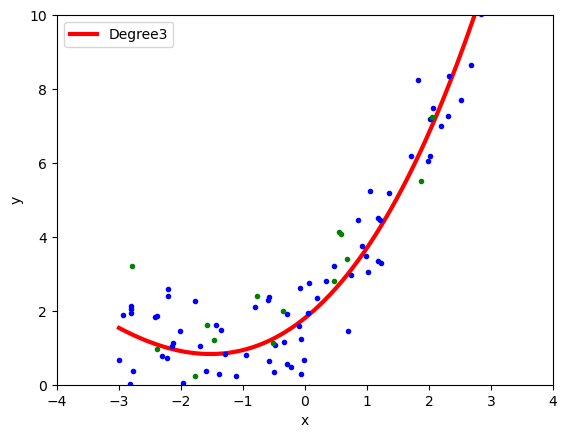

In [54]:
poly_regression(3)

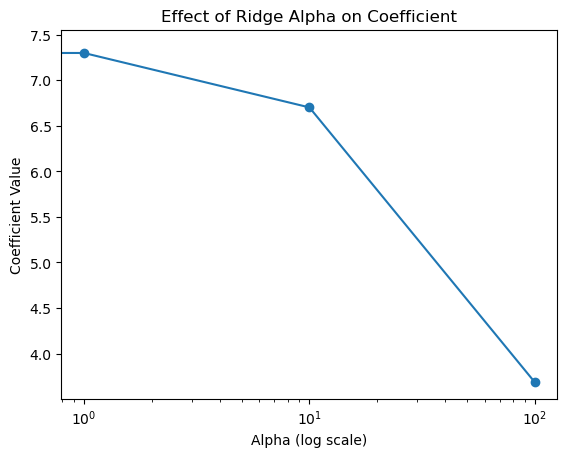

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Sample data
X = np.random.rand(100, 1) * 10
y = 3*X.squeeze() + 7 + np.random.randn(100)*5

alphas = [0, 1, 10, 100]
coefs = []

for alpha in alphas:
    ridge = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha))
    ])
    ridge.fit(X, y)
    coefs.append(ridge.named_steps['ridge'].coef_[0])

plt.plot(alphas, coefs, marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficient Value')
plt.title('Effect of Ridge Alpha on Coefficient')
plt.show()
